In [1]:
#IMPORTS
import string
from collections import Counter
import datetime as dt
from numpy import array
import numpy as np
import pickle
from pickle import load, dump
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
from keras import Input
from keras.layers import Dropout, Dense, Embedding, LSTM
from keras.layers.merge import add
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import keras.backend as K
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# model1
<img src="files/images/model_summary.png">
<img src="files/images/model_performance.png">

# model2
<img src="files/images/model2_summary.png">
<img src="files/images/model2_performance.png">

In [12]:
#CHANGING THE MODEL ARCHITECHTURE TO ACCOUNT FOR UNDERFITTING I.E. INCREASING MORE LAYERS
input1 = Input(shape=(2048,))
fe1 = Dropout(0.5)(input1)
fe2 = Dense(512, activation='relu')(fe1)
fe3 = Dropout(0.5)(fe2)
fe4 = Dense(256, activation='relu')(fe3)

input2 = Input(shape=(max_caption_length,))
se1 = Embedding(vocabulary_size+1, embedding_dim, mask_zero=True)(input2)
se2 = Dropout(0.5)(se1)
se3 = Dense(1024)(se2)
se4 = Dropout(0.5)(se3)
se5 = Dense(512)(se4)
se6 = LSTM(256)(se5)

decoder1 = add([fe4, se6])
decoder2 = Dense(256, activation='relu')(decoder1)

output = Dense(vocabulary_size+1, activation='softmax')(decoder2)
model3 = Model(inputs=[input1, input2], outputs=output, name="model3")

model3.summary()

Model: "model3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 34)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 34, 200)      330400      input_4[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
dropout_7 (Dropout)             (None, 34, 200)      0           embedding_2[0][0]                
_____________________________________________________________________________________________

In [15]:
#SETTING ADDITIONAL PROPERTIES FOR EMBEDDING LAYER I.E. NO TRAINING ON EMBEDDINGS LAYER
model3.layers[1].set_weights([embeddings_matrix])
model3.layers[1].trainable = False

#COMPILING THE MODEL
model3.compile(loss='categorical_crossentropy', optimizer='adam')

In [16]:
#HYPERPARAMETERS OF TRAINING SESSION 1
#NOTE: DEFAULT LEARNING RATE OF KERAS MODEL IS 0.001
epochs = 20
batch_size = 3
steps = len(train_dataset)//batch_size
#NOTE: SIZE OF TRAIN DATASET IS 6000

In [17]:
#TRAINING SESSION 1
for i in range(epochs):
    generator = data_generator(train_dataset, encoded_train_images, word_to_index, max_caption_length, batch_size)
    model3.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)

Epoch 1/1
2000/2000 [==============================] - 1594s 797ms/step - loss: 4.2324
Epoch 1/1
2000/2000 [==============================] - 1545s 773ms/step - loss: 3.8170
Epoch 1/1
2000/2000 [==============================] - 1559s 780ms/step - loss: 3.7120
Epoch 1/1
2000/2000 [==============================] - 1556s 778ms/step - loss: 3.6489
Epoch 1/1
2000/2000 [==============================] - 1553s 776ms/step - loss: 3.6047
Epoch 1/1
2000/2000 [==============================] - 1540s 770ms/step - loss: 3.5776
Epoch 1/1
2000/2000 [==============================] - 1528s 764ms/step - loss: 3.5510
Epoch 1/1
2000/2000 [==============================] - 1527s 763ms/step - loss: 3.5284
Epoch 1/1
2000/2000 [==============================] - 1533s 767ms/step - loss: 3.5123
Epoch 1/1
2000/2000 [==============================] - 1549s 775ms/step - loss: 3.5011
Epoch 1/1
2000/2000 [==============================] - 1554s 777ms/step - loss: 3.4858
Epoch 1/1
2000/2000 [======================

In [18]:
#HYPERPARAMETERS OF TRAINING SESSION 2
#NOTE: LEARNING RATE IS CHANGED TO 0.0003
K.set_value(model3.optimizer.lr, 0.0003)
epochs = 5
batch_size = 6
steps = len(train_dataset)//batch_size
#NOTE: SIZE OF TRAIN DATASET IS 6000

In [19]:
#TRAINING SESSION 2
for i in range(epochs):
    generator = data_generator(train_dataset, encoded_train_images, word_to_index, max_caption_length, batch_size)
    model3.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
    model3.save('./model3_weights/model_' + str(i) + '.h5')

Epoch 1/1
1000/1000 [==============================] - 1358s 1s/step - loss: 3.4108
Epoch 1/1
1000/1000 [==============================] - 1353s 1s/step - loss: 3.3659
Epoch 1/1
1000/1000 [==============================] - 1414s 1s/step - loss: 3.3488
Epoch 1/1
1000/1000 [==============================] - 1596s 2s/step - loss: 3.3309
Epoch 1/1
1000/1000 [==============================] - 1583s 2s/step - loss: 3.3202


In [20]:
#HYPERPARAMETERS OF TRAINING SESSION 3
#NOTE: LEARNING RATE IS CHANGED TO 0.00001
K.set_value(model3.optimizer.lr, 0.00001)
epochs = 5
batch_size = 15
steps = len(train_dataset)//batch_size
#NOTE: SIZE OF TRAIN DATASET IS 6000

In [21]:
#TRAINING SESSION 3
for i in range(epochs):
    generator = data_generator(train_dataset, encoded_train_images, word_to_index, max_caption_length, batch_size)
    model3.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
    model3.save('./model3_weights/model_' + str(i+5) + '.h5')

Epoch 1/1
400/400 [==============================] - 1272s 3s/step - loss: 3.3340
Epoch 1/1
400/400 [==============================] - 1268s 3s/step - loss: 3.3281
Epoch 1/1
400/400 [==============================] - 1269s 3s/step - loss: 3.3224
Epoch 1/1
400/400 [==============================] - 1272s 3s/step - loss: 3.3212
Epoch 1/1
400/400 [==============================] - 1254s 3s/step - loss: 3.3153


In [22]:
#LOADING TRAINED WEIGHTS TO MODEL
model3.load_weights('./model3_weights/model_9.h5')

In [23]:
def predict3(feature_vec):
    partial_caption = "startseq"
    for i in range(max_caption_length):
        seq = [word_to_index[word] for word in partial_caption.split() if word in word_to_index]
        seq = pad_sequences([seq], maxlen=max_caption_length)
        yhat = model3.predict([feature_vec,seq], verbose=0)
        yhat = np.argmax(yhat)
        word = index_to_word[yhat]
        partial_caption += ' ' + word
        if word == 'endseq':
            break
    final_caption = partial_caption.split()[1:-1]
    final_caption = ' '.join(final_caption)
    return final_caption

model3
3231880001_193a579b97


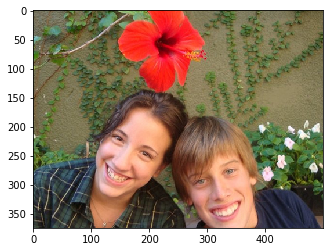

prediction: two girls are sitting on the grass
Ground Truth: the boy and girl pose for picture with large red flower above their heads
Ground Truth: the teenage boy and girl are smiling under red flower
Ground Truth: two kids smiling underneath red flower
Ground Truth: two people smile underneath large red flower and in front of vinecovered wall
Ground Truth: two people standing in front of vine covered wall with red flower overhead


In [41]:
#OBSERVATION OF PERFORMANCE ON RANDOM IMAGES FROM DEV DATASET
key = list(dev_dataset.keys())[np.random.randint(0, 1000)]
print("model3")
print(key)
feature_vec = encoded_dev_images[key].reshape((1, 2048))
image_path = "../../../Downloads/Flickr8k/Flicker8k_dataset/"+key+".jpg"
image_ = plt.imread(image_path)
plt.imshow(image_)
plt.show()
print("prediction: {}".format(predict3(feature_vec)))
for caption in dev_dataset[key]:
    caption = ' '.join(caption.split()[1:-1])
    print("Ground Truth: {}".format(caption))

In [28]:
#LOADING INCEPTION
model = InceptionV3(weights='imagenet')
model_new = Model(model.input, model.layers[-2].output)

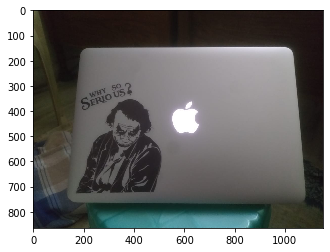

prediction: two dogs are playing with each other dogs


In [29]:
#OBSERVATION OF PERFORMANCE ON RANDOM IMAGES INPUT FROM LOCAL MACHINE
def image_to_feature_vec(image_path):
    img = image.load_img(image_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    feature_vec = model_new.predict(x)
    feature_vec = np.reshape(feature_vec, feature_vec.shape[1])
    return feature_vec.reshape((1, 2048))

image_path = "../../../Downloads/laptop_test.jpeg"
feature_vec = image_to_feature_vec(image_path)
image_ = plt.imread(image_path)
plt.imshow(image_)
plt.show()
print("prediction: {}".format(predict3(feature_vec)))

In [30]:
#PERFORMANCE ON TRAIN DATASET, DEV DATASET
batch_size = 3
steps = len(train_dataset)//batch_size
train_generator = data_generator(train_dataset, encoded_train_images, word_to_index, max_caption_length, batch_size)
train_performance = model3.evaluate(train_generator, steps=steps, verbose=0)

batch_size = 4
steps = len(dev_dataset)//batch_size
dev_generator = data_generator(dev_dataset, encoded_dev_images, word_to_index, max_caption_length, batch_size)
dev_performance = model3.evaluate(dev_generator, steps=steps, verbose=0)

print("LOSS ON TRAIN DATASET: {}".format(train_performance))
print("LOSS ON DEV DATASET: {}".format(dev_performance))

LOSS ON TRAIN DATASET: 3.2238173484802246
LOSS ON DEV DATASET: 3.7737538814544678
